### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [3]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [4]:
df['age'].isnull().sum()

177

In [5]:
#picking  1777 sample values from  not na values of age column
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [6]:
df[df['age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [7]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [8]:
median=df['age'].median()

In [9]:
median

28.0

In [12]:
df[df['age']==28].shape

(25, 3)

In [13]:
impute_nan(df,"age",median)

In [14]:
df.head()

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [15]:
df[df['age_median']==28]

,survived,age,fare,age_median,age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
23,1,28.0,35.5000,28.0,28.00
26,0,NaN,7.2250,28.0,36.00
...,...,...,...,...,...
868,0,NaN,9.5000,28.0,15.00
874,1,28.0,24.0000,28.0,28.00
878,0,NaN,7.8958,28.0,34.00
883,0,28.0,10.5000,28.0,28.00


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

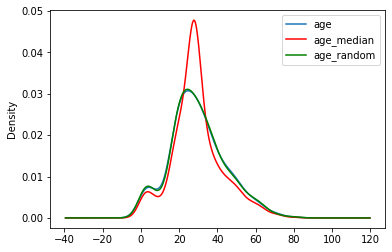

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df['age_median'].plot(kind='kde', ax=ax, color='red')
df['age_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

### Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [19]:
df=pd.read_csv('titanic.csv', usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
import numpy as np
df['age_NAN']=np.where(df['age'].isnull(),1,0)

In [21]:
df.head()

,survived,age,fare,age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [22]:
df['age'].median()

28.0

In [23]:
df['age'].fillna(df['age'].median(),inplace=True)

In [24]:
df.head(10)

,survived,age,fare,age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

### End of Distribution imputation

In [25]:
df=pd.read_csv('titanic.csv', usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

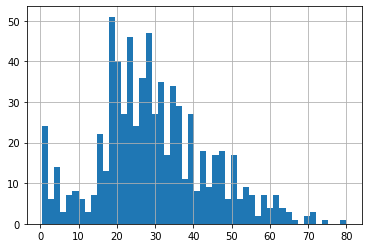

In [26]:
df['age'].hist(bins=50)

In [27]:
extreme=df['age'].mean()+3*df['age'].std()

<AxesSubplot:xlabel='age'>

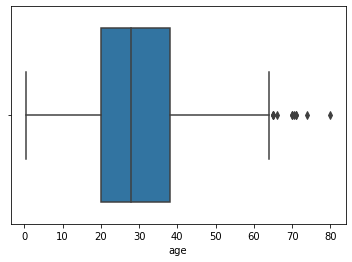

In [28]:
import seaborn as sns
sns.boxplot('age',data=df)

In [29]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [30]:
impute_nan(df,'age',df['age'].median(),extreme)

In [31]:
df.head()

,survived,age,fare,age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

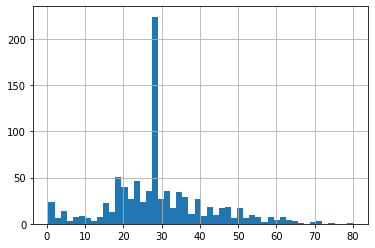

In [33]:
df['age'].hist(bins=50)

<AxesSubplot:>

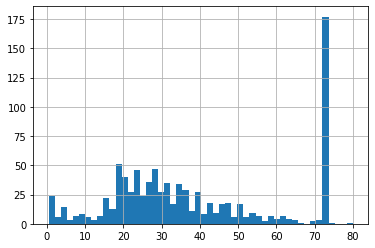

In [34]:
df['age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='age_end_distribution'>

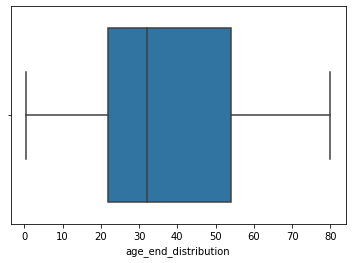

In [35]:
sns.boxplot('age_end_distribution',data=df)

<AxesSubplot:xlabel='age'>

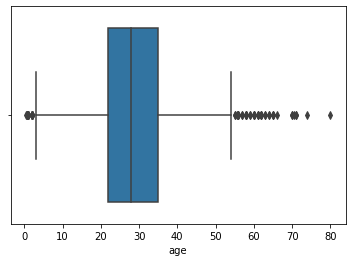

In [36]:
sns.boxplot('age',data=df)